# Forecasting Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

## 1. Airlines Dataset

In [2]:
rohu = pd.read_excel('Airlines+Data.xlsx',
                       index_col=0, 
                       parse_dates=['Month'])
rohu

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


## Visualizations

In [3]:
rohu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [4]:
rohu.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

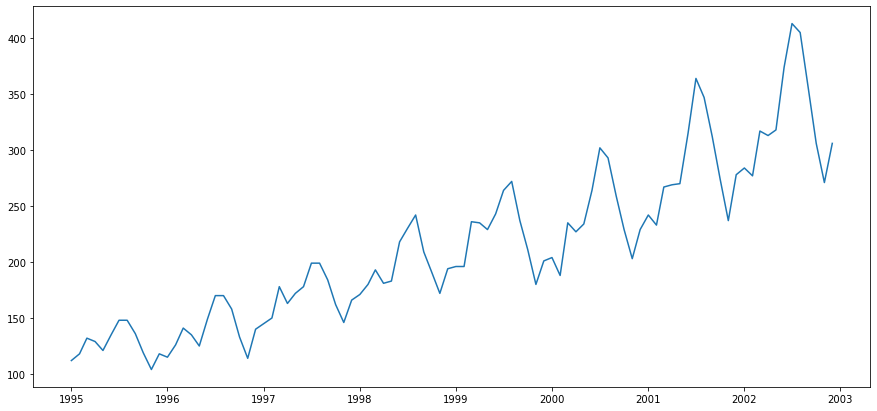

In [5]:
plt.figure(figsize = (15,7))
plt.plot(rohu)

In [6]:
rohu = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True)
rohu

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


#### Histogram and Density Plots

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

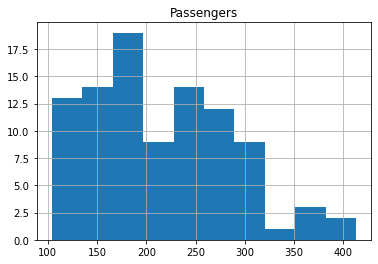

In [7]:
# create a histogram plot
rohu.hist()

<AxesSubplot:ylabel='Density'>

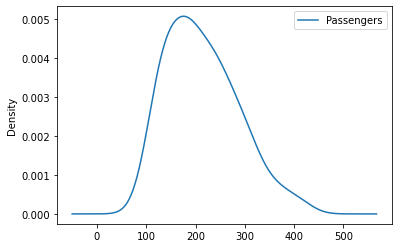

In [8]:
# create a density plot
rohu.plot(kind='kde')

In [9]:
rohu = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
rohu

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_368\2983695146.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  rohu = pd.read_excel("Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [10]:
type(rohu)

pandas.core.series.Series

In [11]:
# Grouping by Year
groups = rohu.groupby(pd.Grouper(freq='A'))
groups

In [12]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

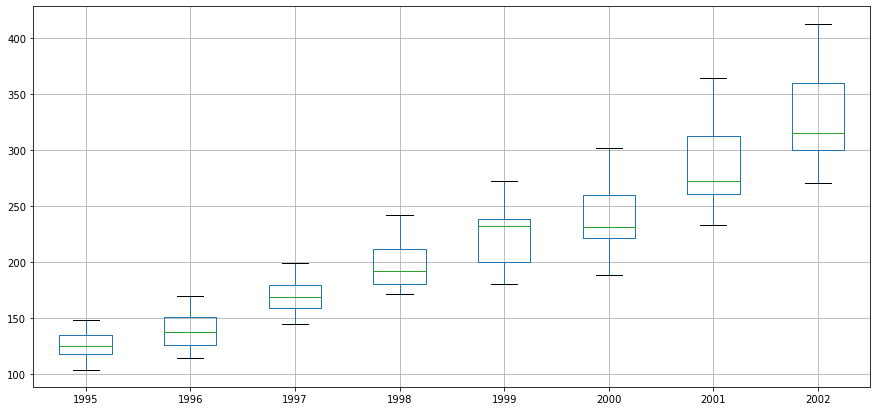

In [13]:
plt.figure(figsize = (15,7))
years.boxplot()

#### Lag plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

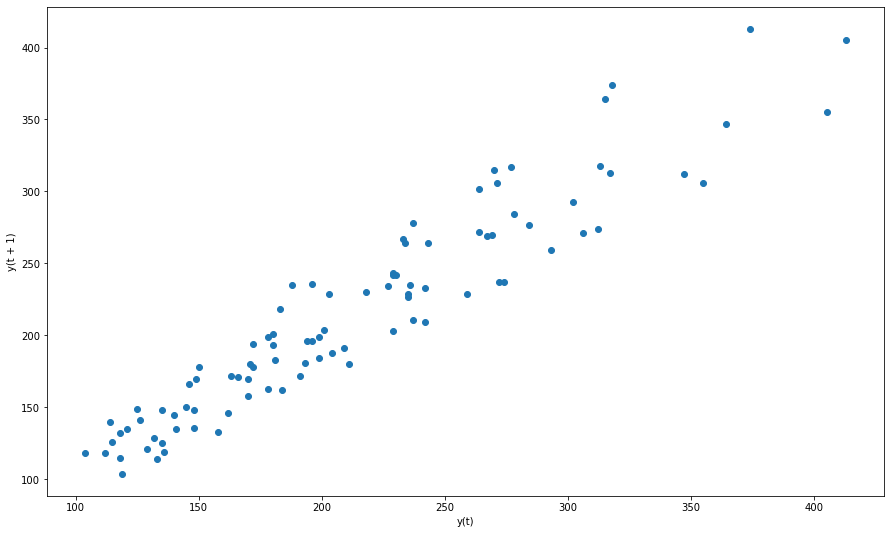

In [14]:
# create a scatter plot
plt.figure(figsize = (15,9))
pd.plotting.lag_plot(rohu)

<Figure size 2304x1440 with 0 Axes>

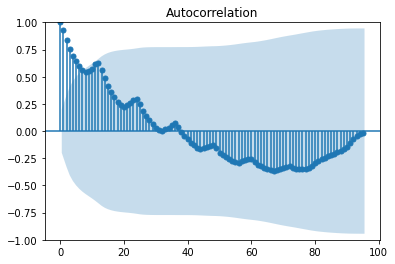

In [15]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (32,20))
plot_acf(rohu, lags=95)
plt.show()

### Sampling and Basic Transformations 

#### Upsampling Data

In [16]:
rohu = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
rohu

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_368\2983695146.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  rohu = pd.read_excel("Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [17]:
rohu.shape

(96,)

In [18]:
upsampled = rohu.resample('D').mean()
upsampled.head(20)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
Freq: D, Name: Passengers, dtype: float64

In [19]:
upsampled.shape

(2892,)

##### Interpolate the Missing Value

In [20]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
Freq: D, Name: Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

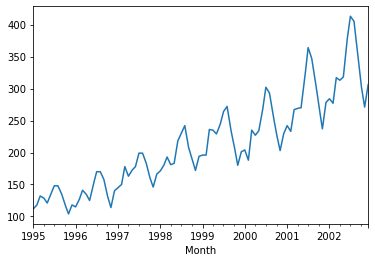

In [21]:
interpolated.plot()

<AxesSubplot:xlabel='Month'>

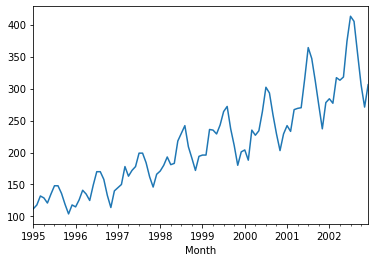

In [22]:
rohu.plot()

#### Downsampling Data

In [23]:
# downsample to quarterly intervals
resample = rohu.resample('Q')
quarterly_mean_sales = resample.mean()

<AxesSubplot:xlabel='Month'>

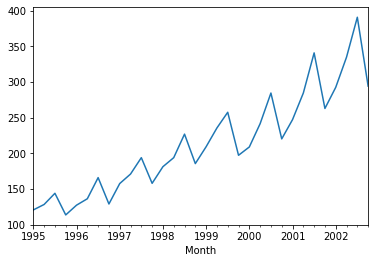

In [24]:
quarterly_mean_sales.plot()

## Tranformations

In [25]:
# load and plot a time series
rohu=pd.read_excel("Airlines+Data.xlsx",index_col=0,header=0, parse_dates=True)
rohu

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


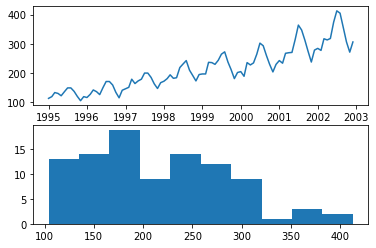

In [26]:
# line plot
plt.subplot(211)
plt.plot(rohu)

# histogram
plt.subplot(212)
plt.hist(rohu)

plt.show()

#### Log Transform

In [27]:
dataframe = pd.DataFrame(np.log(rohu.values), columns = ['Passengers'])
dataframe

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


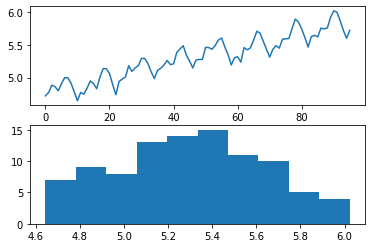

In [28]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [29]:
quarterly_mean_sales.head()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

#### Square Root Transform

In [30]:
dataframe = pd.DataFrame(np.sqrt(rohu.values), columns = ['Passengers'])
dataframe

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


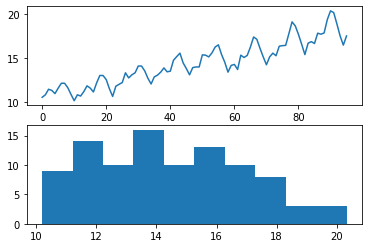

In [31]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

# Forecasting - Model Based Methods 

In [32]:
rohu=pd.read_excel("Airlines+Data.xlsx")
rohu

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

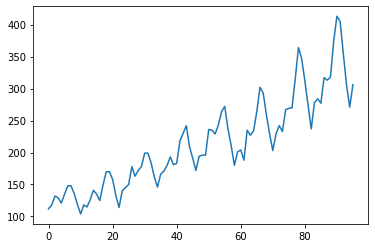

In [33]:
rohu['Passengers'].plot()

In [34]:
rohu["month"] = rohu['Month'].dt.strftime("%b") # month extraction
rohu["year"] = rohu['Month'].dt.strftime("%Y") # year extraction

In [35]:
rohu

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [36]:
mp = pd.pivot_table(data = rohu,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
mp

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

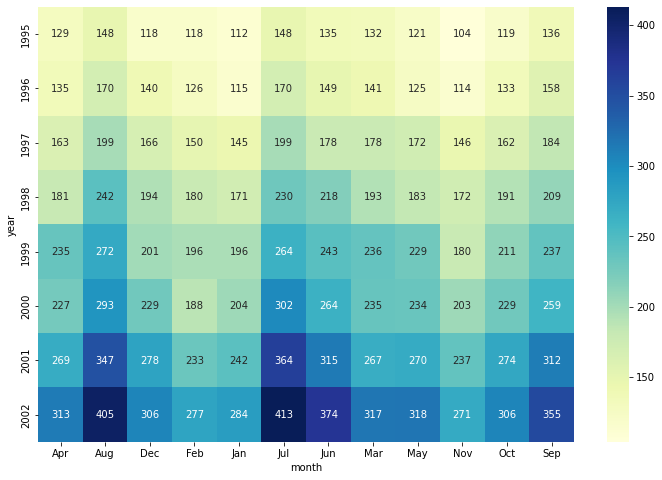

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(mp,
            annot=True,
            fmt="g",
            cmap = 'YlGnBu') #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

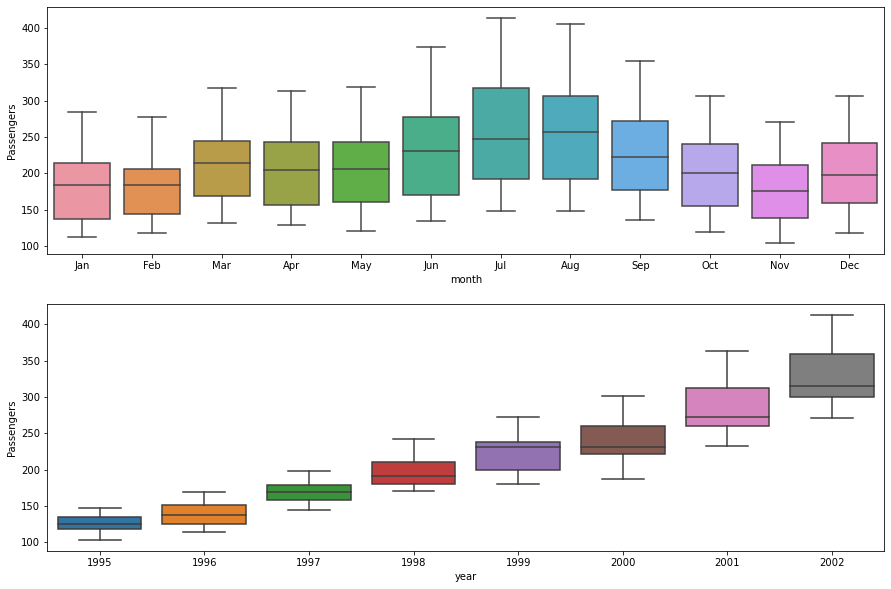

In [38]:
# Boxplot for ever
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=rohu)

plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=rohu)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

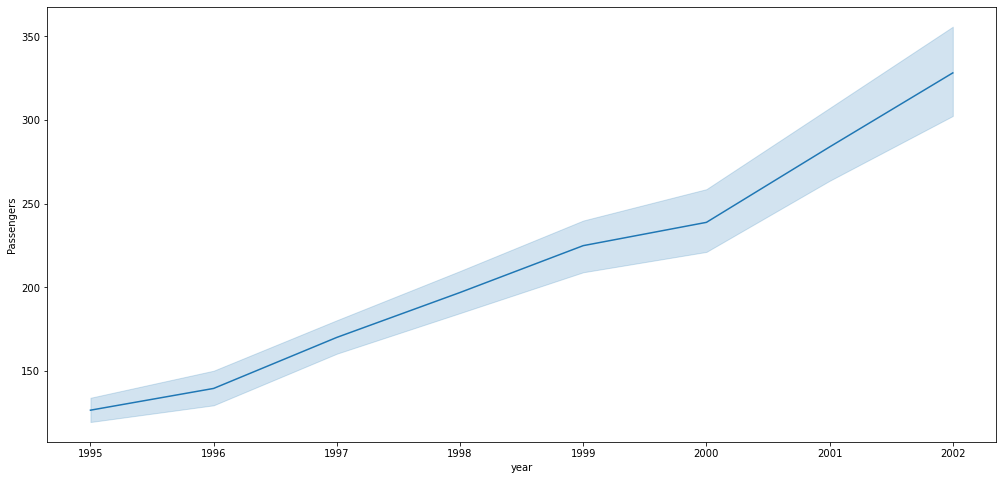

In [39]:
plt.figure(figsize=(17,8))
sns.lineplot(x="year",y="Passengers",data=rohu)

## Splitting data

In [40]:
rohu

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [41]:
rohu.shape

(96, 4)

In [42]:
# Complete the dataset
rohu['t']=np.arange(1,97)
rohu['t_square']=np.square(rohu.t)
rohu['log_Passengers']=np.log(rohu.Passengers)
rohu2=pd.get_dummies(rohu['month'])

In [43]:
rohu

,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [44]:
rohu2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
rohu=pd.concat([rohu,rohu2],axis=1)
rohu

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
# For self understanding of forecasting values data split into multiples of 12
Train = rohu.head(84)
Test = rohu.tail(12)

In [47]:
Train

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
Test

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,2002,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,Jul,2002,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [49]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480265

In [50]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315619

In [51]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.051888979331615

In [52]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

In [53]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612081384

In [54]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708618

In [55]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.519172544323684

In [56]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

325.7312105213401

In [57]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [58]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=rohu).fit()

In [59]:
pred_new  = pd.Series(model_full.predict(rohu))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [60]:
rohu["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

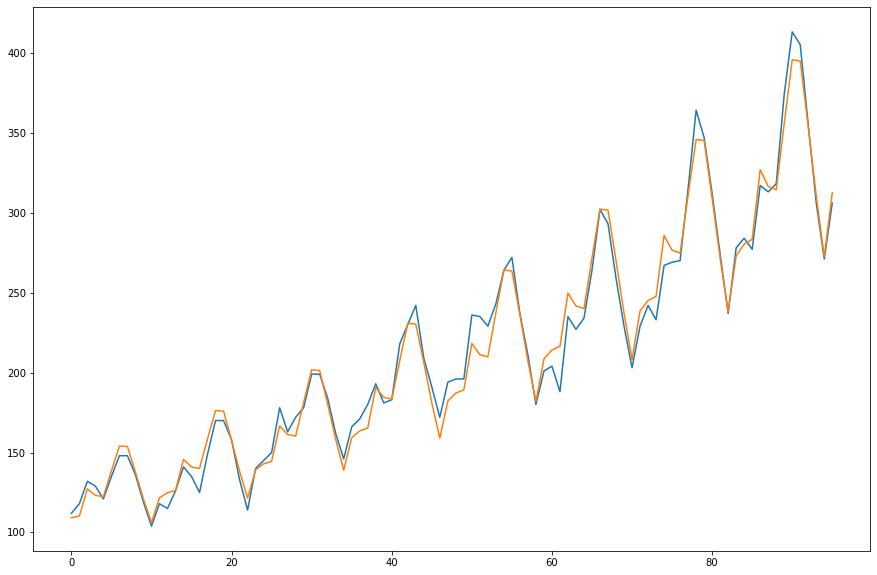

In [61]:
plt.figure(figsize=(15,10))
plt.plot(rohu[['Passengers','forecasted_Passengers']].reset_index(drop=True))

### Splitting data

In [62]:
rohu=pd.read_excel("Airlines+Data.xlsx")
Train = rohu.head(84)
Test = rohu.tail(12)

In [63]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [64]:
Test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


# Moving Average 

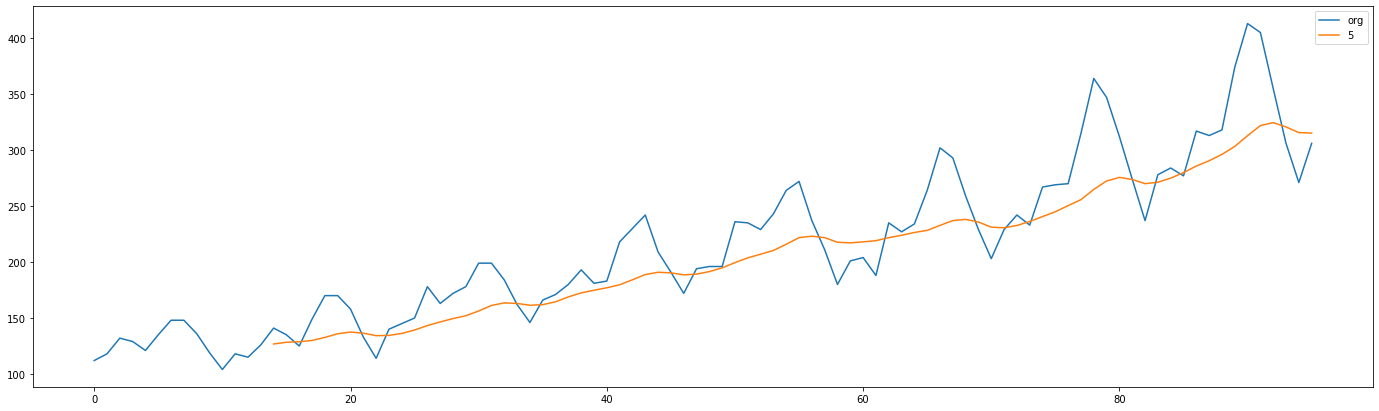

In [65]:
plt.figure(figsize=(24,7))
rohu['Passengers'].plot(label="org")
rohu["Passengers"].rolling(15).mean().plot(label=str(5))
plt.legend(loc='best')

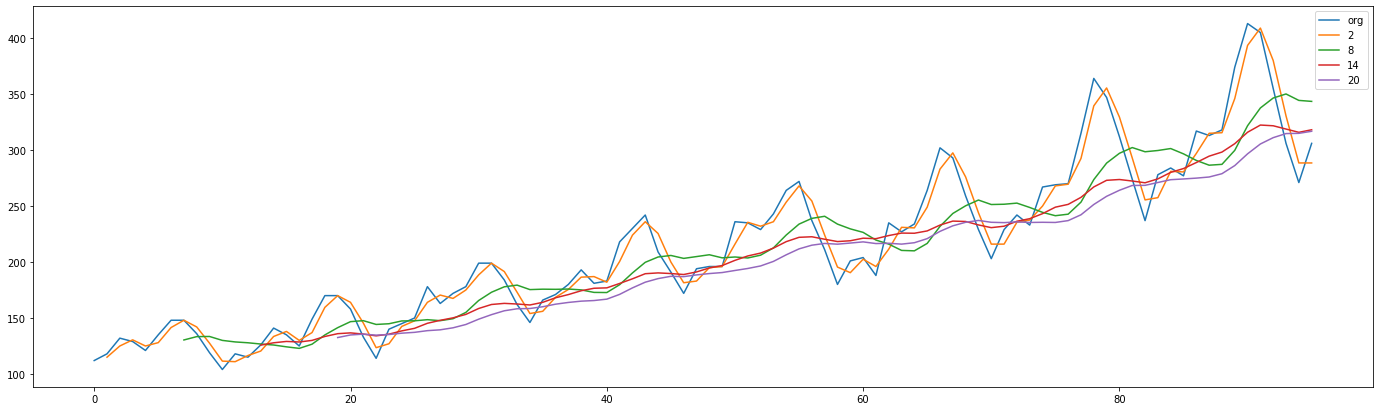

In [66]:
plt.figure(figsize=(24,7))
rohu['Passengers'].plot(label="org")
for i in range(2,24,6):
    rohu["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 

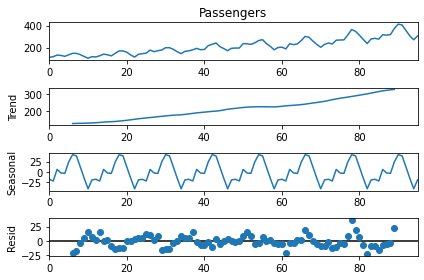

In [67]:
decompose_ts_add = seasonal_decompose(rohu['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots

C:\Users\ROHAN\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


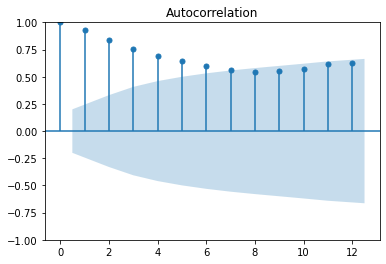

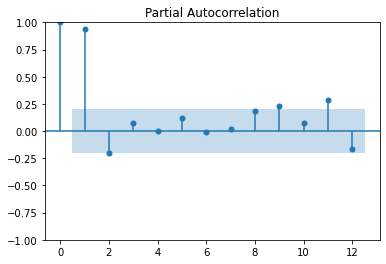

In [68]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(rohu.Passengers,lags=12)
tsa_plots.plot_pacf(rohu.Passengers,lags=12)
plt.show()

### Evaluation Metric MAPE

In [69]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [70]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

13.411274740513823

### Holt method 

In [71]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_368\2579047746.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


23.530719652100696

### Holts winter exponential smoothing with additive seasonality and additive trend

In [72]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.730086914626161

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [73]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.8211037520184434

## Final Model by combining train and test

In [74]:
hwe_model_mul_add = ExponentialSmoothing(rohu["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [75]:
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

96     312.899723
97     308.171686
98     355.533357
99     345.770496
100    345.696845
101    392.471713
102    436.502474
103    429.860339
104    380.173941
105    332.318445
106    290.626599
107    330.591734
dtype: float64

# Forecasting using Auto ARIMA model 

In [76]:
import statsmodels.tsa.seasonal
#!pip install pmdarima
from pmdarima import auto_arima

In [77]:
rohu=pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)
rohu

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<AxesSubplot:xlabel='Month'>

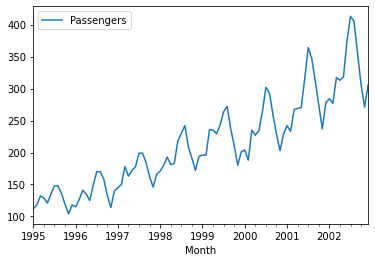

In [78]:
rohu.plot()

In [79]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(rohu)

(0.01, False)

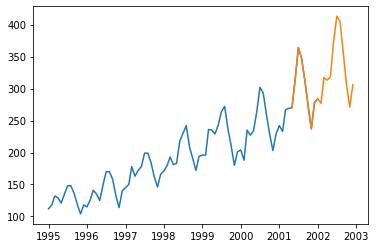

In [80]:
train = rohu[:85]
test = rohu[-20:]
plt.plot(train)
plt.plot(test)

In [81]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn',trace=True,
                        suppress_warnings=True,stepwise=True,
                         random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.172, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=537.489, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=537.888, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=540.215, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=539.489, Time=0.80 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=539.489, Time=0.53 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=537.948, Time=0.50 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=539.745, Time=0.17 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=539.466, Time=0.42 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=539.078, Time=0.47 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=537.388, Time=0.43 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=540.192, Time=0.14 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=539.385, Time=0.63 sec
 ARIMA(0,1,1)(1,1,1)[12]             

In [82]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -265.694
Date:                             Fri, 30 Sep 2022   AIC                            537.388
Time:                                     21:50:13   BIC                            544.218
Sample:                                 01-01-1995   HQIC                           540.108
                                      - 01-01-2002                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2607      0.105     -2.472      0.013      -0.467      -0.054
ar.S.L12      -0.2625      0.098     -2.683      0.007      -0.454      -0.071
sigma2        92.7245     16.167      5.735      0.000      61.038     124.411
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.99   Prob(JB):                         0.27
Heteroskedasticity (H):               2.60   Skew:                             0.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_pass']
prediction

,predicted_pass
Month,
2001-05-01,NaN
2001-06-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN
2001-10-01,NaN
2001-11-01,NaN
2001-12-01,NaN
2002-01-01,NaN


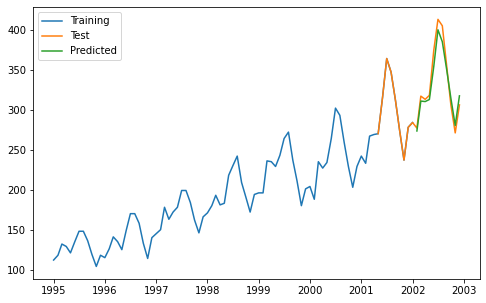

In [84]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper left')
plt.show()

#### Persistence/ Base model

In [85]:
# evaluate a persistence model and load data
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_368\3502451253.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-08-01    347
2001-09-01    312
2001-10-01    274
2001-11-01    237
2001-12-01    278
Name: 1, Length: 84, dtype: int64

In [86]:
# prepare data
X = train.values
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278], dtype=int64)

In [87]:
X = X.astype('float32')
X

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278.], dtype=float32)

In [88]:
train_size = int(len(X) * 0.50)
train_size

42

In [89]:
train, test = X[0:train_size], X[train_size:]

In [90]:
train

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218.],
      dtype=float32)

In [91]:
test

array([230., 242., 209., 191., 172., 194., 196., 196., 236., 235., 229.,
       243., 264., 272., 237., 211., 180., 201., 204., 188., 235., 227.,
       234., 264., 302., 293., 259., 229., 203., 229., 242., 233., 267.,
       269., 270., 315., 364., 347., 312., 274., 237., 278.],
      dtype=float32)

In [92]:
# walk-forward validation
history = [x for x in train]
import warnings
history

[112.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 148.0,
 148.0,
 136.0,
 119.0,
 104.0,
 118.0,
 115.0,
 126.0,
 141.0,
 135.0,
 125.0,
 149.0,
 170.0,
 170.0,
 158.0,
 133.0,
 114.0,
 140.0,
 145.0,
 150.0,
 178.0,
 163.0,
 172.0,
 178.0,
 199.0,
 199.0,
 184.0,
 162.0,
 146.0,
 166.0,
 171.0,
 180.0,
 193.0,
 181.0,
 183.0,
 218.0]

## Predictions

In [93]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

In [94]:
# report performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 26.029


#### Build Model based on the optimized values

In [95]:
# save finalized model to file and load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
train

,112
1995-01-01,
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
...,...
2001-08-01,347
2001-09-01,312
2001-10-01,274


In [96]:
# prepare data
X = train.values
X = X.astype('float32')

In [97]:
# fit model
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 12)
forecast

C:\Users\ROHAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([285.42340898, 286.31684867, 301.74727047, 309.57920908,
       322.48027776, 325.5521459 , 328.29566959, 322.59323859,
       316.87151067, 307.51815066, 301.28148545, 295.99177013])

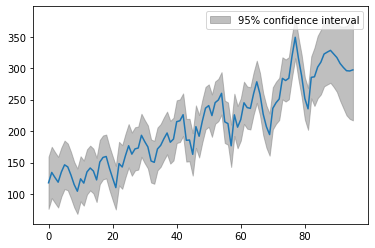

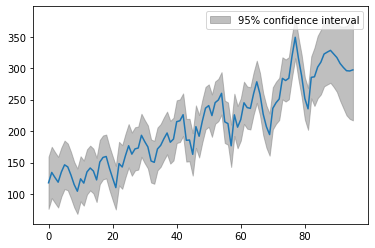

In [98]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)
#model_fit.plot_predict(1, 96)

In [99]:
#Error on the test data
val = pd.read_csv('validation.csv', header=None)
rmse = np.sqrt(mean_squared_error(val[1], forecast))
rmse

39.93678568490967

#### Combine train and test data and build final model

In [100]:
# fit model
rohu=pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)

In [101]:
# prepare data
X = train.values
X = X.astype('float32')

In [102]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()

C:\Users\ROHAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
forecast=model_fit.forecast(steps=12)
forecast

array([285.42340898, 286.31684867, 301.74727047, 309.57920908,
       322.48027776, 325.5521459 , 328.29566959, 322.59323859,
       316.87151067, 307.51815066, 301.28148545, 295.99177013])

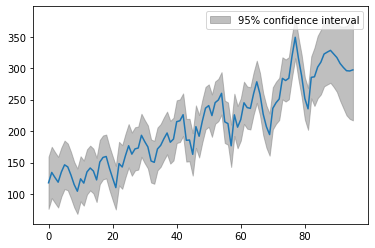

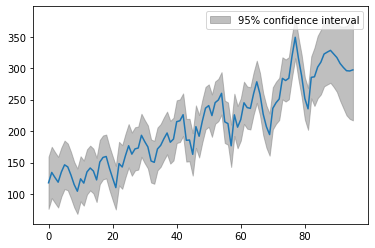

In [104]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)

#### Inference: By using Auto ARIMA Model we get values for ARIMA as (0,1,1)(1,1,0) [12]. 